# Sparse Hebbian Learning: toward a quantitative measure of the quality of filters

We are interested here in learning the "optimal" components of a set of images (let's say some "natural", usual images). As there is no supervisor to guide the learning, this is called unsupervised learning. Our basic hypothesis to find the best ("optimal") components will be to assume that *a priori* the most sparse is more plausible. We will implement the derived algorithm in this set of scripts.



In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(precision=4, suppress=True)
import pandas as pd

## experiments

To test and control for the role of different parameters, we will have a first object (in the [shl_experiments.py](https://github.com/bicv/SHL_scripts/blob/master/shl_scripts/shl_experiments.py) script) that controls a learning experiment. It contains all relevant parameters, but can also keep a trace of the history of some statistics. This is useful to compare the relative efficiency of the different solutions.


In [3]:
DEBUG_DOWNSCALE, verbose = 10, 0
DEBUG_DOWNSCALE, verbose = 1, 0
DEBUG_DOWNSCALE, verbose = 10, 10
DEBUG_DOWNSCALE, verbose = 1, 10

tag = 'mutual_information'

eta_homeo = 0.02

homeo_methods = ['HEH', 'None']
nb_quant = 128
nb_quant = 256
C = 5.
alpha_homeo = 0.0

homeo_methods = ['HAP', 'None']
alpha_homeo = 1.

n_iter = 2**13 + 1

record_num_batches = 2**12
N_show = 120
max_patches = 10
seed = 42
np.random.seed(seed)

opts = dict(DEBUG_DOWNSCALE=DEBUG_DOWNSCALE, n_iter=n_iter, 
            eta_homeo=eta_homeo, alpha_homeo=alpha_homeo, 
            C=C, nb_quant=nb_quant, P_cum=None, verbose=verbose)

from shl_scripts.shl_experiments import SHL
shl = SHL(**opts)
data = shl.get_data(matname=tag)

Extracting data..No cache found data_cache/mutual_information_data: Extracting data... Extracting data..Photo2018-01-18_0440462510.jpg, Photo2018-01-18_0309392473.jpg, Photo2018-01-18_0343102547.jpg, Photo2018-02-18_0911262631 square.jpg, Photo2018-01-18_0327052545.jpg, Photo2018-01-18_0440352508.jpg, Photo2018-01-18_0230432458.jpg, Photo2018-01-18_0316462527.jpg, Photo2018-01-18_0553172551.jpg, Photo2018-01-18_0423102502.jpg, Photo2018-01-18_0422432500.jpg, Photo2018-01-18_0441022511.jpg, Data is of shape : (65532, 144) - done in 136.69s.
Data is of shape : (65532, 144) - done in 136.97s.


In [4]:
!ls -l {shl.data_cache}/{tag}*
!rm -fr {shl.data_cache}/{tag}*lock*

-rw-r--r--  1 laurentperrinet  staff  75492992 Feb 23 12:49 data_cache/mutual_information_data.npy


In [5]:
print('number of patches, size of patches = ', data.shape)
print('average of patches = ', data.mean(), ' +/- ', data.mean(axis=1).std())
SE = np.sqrt(np.mean(data**2, axis=1))
print('average energy of data = ', SE.mean(), '+/-', SE.std())

number of patches, size of patches =  (65532, 144)
average of patches =  1.2082279857504907e-05  +/-  0.0066444470393307664
average energy of data =  0.029788900141200267 +/- 0.037919085394187625


In [6]:
stick = np.arange(shl.n_dictionary)*nb_quant

indx = np.random.permutation(data.shape[0])[:record_num_batches]
P_cum_zeroeffect = np.linspace(0, 1, nb_quant, endpoint=True)[np.newaxis, :] * np.ones((shl.n_dictionary, 1))


## learning

The actual learning is done in a second object (here ``dico``) from which we can access another set of properties and functions  (see the [shl_learn.py](https://github.com/bicv/SHL_scripts/blob/master/shl_scripts/shl_learn.py) script):

No cache found data_cache/mutual_information_HAP_dico.pkl: Learning the dictionary with algo = mp 
 Training on 65532 patches
Iteration   1 /   8193 (elapsed time:   1s,   0mn   1s)
Iteration  129 /   8193 (elapsed time:  116s,   1mn  56s)
Iteration  257 /   8193 (elapsed time:  239s,   3mn  59s)
Iteration  385 /   8193 (elapsed time:  336s,   5mn  36s)
Iteration  513 /   8193 (elapsed time:  444s,   7mn  24s)
Iteration  641 /   8193 (elapsed time:  557s,   9mn  17s)
Iteration  769 /   8193 (elapsed time:  668s,  11mn   8s)
Iteration  897 /   8193 (elapsed time:  776s,  12mn  56s)
Iteration  1025 /   8193 (elapsed time:  872s,  14mn  32s)
Iteration  1153 /   8193 (elapsed time:  981s,  16mn  21s)
Iteration  1281 /   8193 (elapsed time:  1082s,  18mn   2s)
Iteration  1409 /   8193 (elapsed time:  1174s,  19mn  34s)
Iteration  1537 /   8193 (elapsed time:  1272s,  21mn  12s)
Iteration  1665 /   8193 (elapsed time:  1368s,  22mn  48s)
Iteration  1793 /   8193 (elapsed time:  1461s,  24mn 

Iteration  8193 /   8193 (elapsed time:  4291s,  71mn  31s)
done (total time:  4291s,  71.5mn)
done in 4291.77s.
size of dictionary = (number of filters, size of imagelets) =  (529, 144)
average of filters =  8.799843013552974e-05 +/- 0.009873638293846354
average energy of filters =  1.0 +/- 9.043487695512937e-17


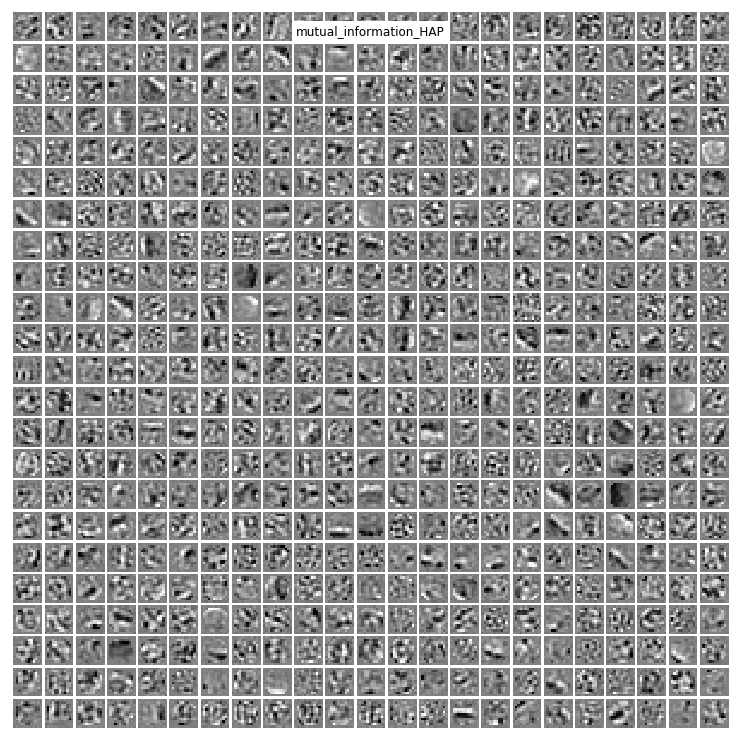

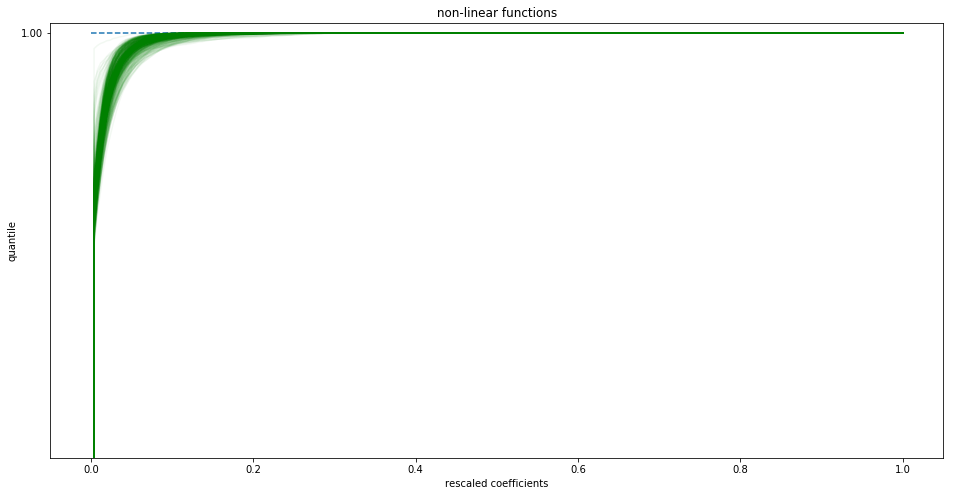

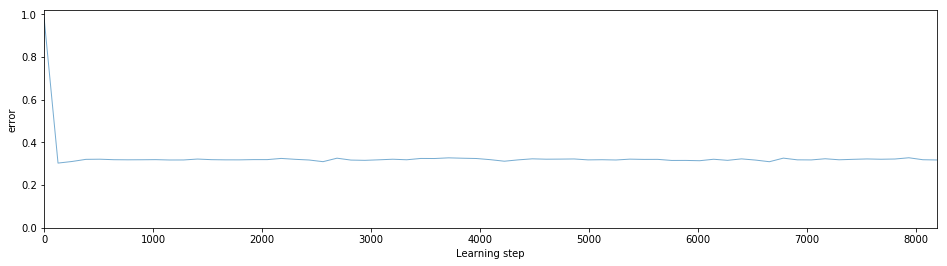

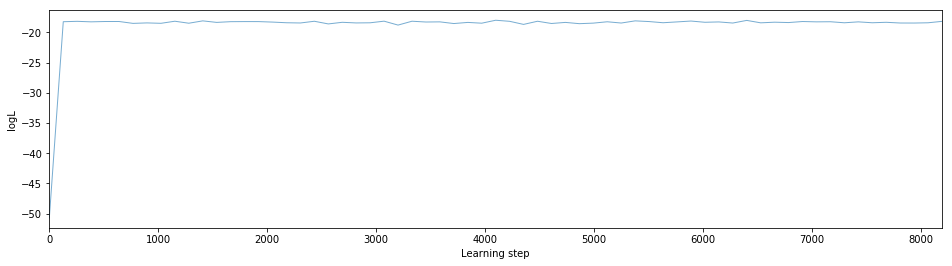

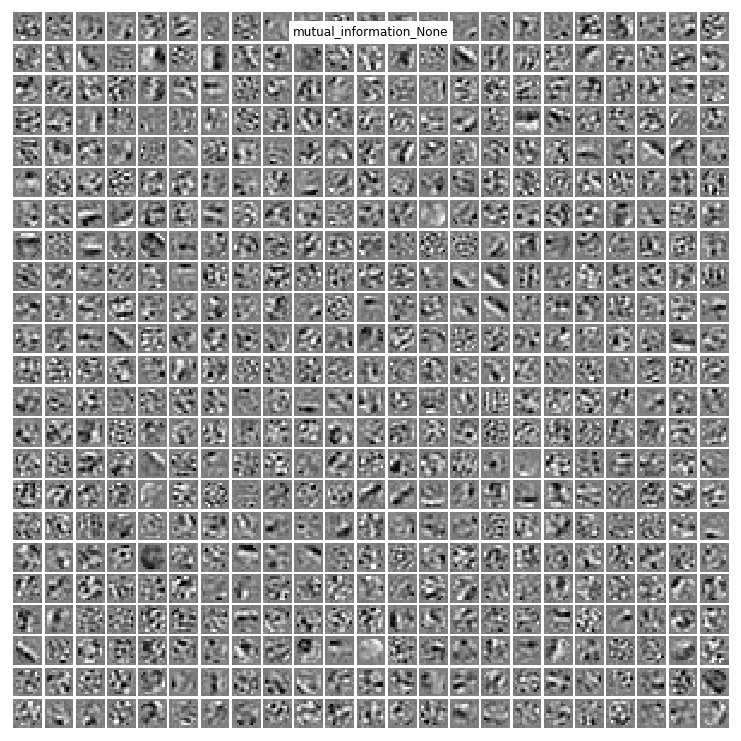

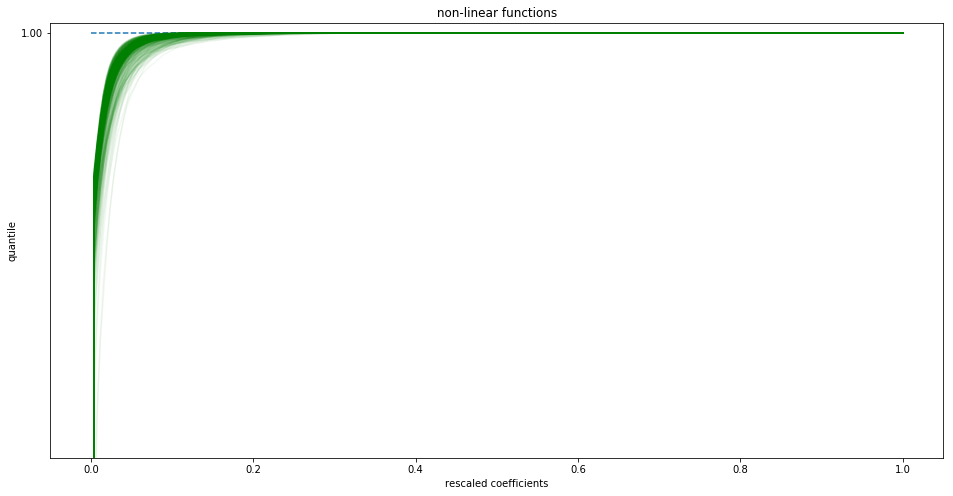

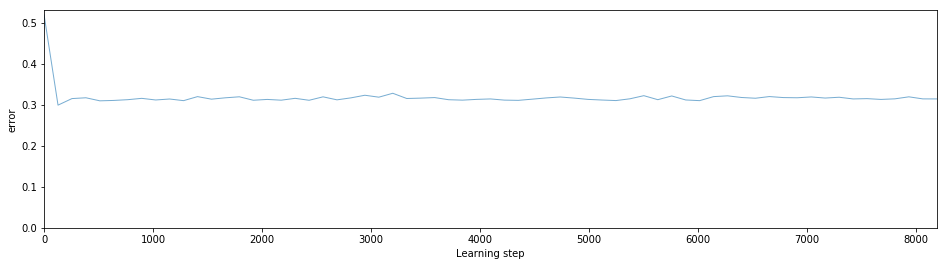

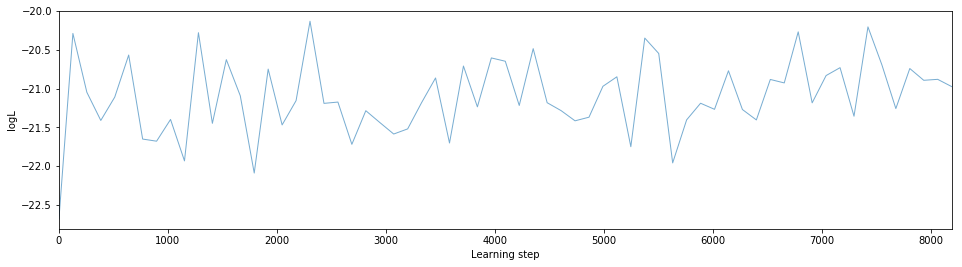

In [7]:
list_figures = ['show_dico', 'time_plot_error', 'time_plot_logL', 'show_Pcum']

dico = {}
for homeo_method in homeo_methods:
    shl = SHL(homeo_method=homeo_method, **opts)
    dico[homeo_method] = shl.learn_dico(data=data, list_figures=list_figures, matname=tag + '_' + homeo_method)

    print('size of dictionary = (number of filters, size of imagelets) = ', dico[homeo_method].dictionary.shape)
    print('average of filters = ',  dico[homeo_method].dictionary.mean(axis=1).mean(), 
          '+/-',  dico[homeo_method].dictionary.mean(axis=1).std())
    SE = np.sqrt(np.sum(dico[homeo_method].dictionary**2, axis=1))
    print('average energy of filters = ', SE.mean(), '+/-', SE.std())

## theory



In [8]:
from scipy.stats import binom
# define the mean
rho = shl.l0_sparseness / shl.n_dictionary

# draw binomial samples
sparse_code_binary = np.random.rand(record_num_batches, shl.n_dictionary) > 1 - rho

In [9]:
print('Sum of non-zero coefficients', sparse_code_binary.sum(), '~=', shl.l0_sparseness*record_num_batches)
print('average non-zeros', np.count_nonzero(sparse_code_binary, axis=0).mean(), '~=', rho*record_num_batches)
print('activation vector', np.count_nonzero(sparse_code_binary, axis=0))

Sum of non-zero coefficients 61661 ~= 61440
average non-zeros 116.56143667296786 ~= 116.14366729678639
activation vector [115 134 102 127 116 121 121  98 118 112 119 127 132 125 129 111 111 147
 117 106 118 116 113 108 116 108 113  99 120 116 119 115 128 114 115 106
 116 131 126 109 106 118 108 133 123 124  99 128 103  97  96 110 115 126
  95 118 122 141 110 109 110 115 117 122 116 114 122 105 126 116 120 111
 120  85 130 119 126 115 105 123 123  89 118 116 125 116 103 118 123  98
 112 118 119 112 124 122 119 116 116 103 118 127 121 108 126 117 123 122
 111 127 101 103 117 128 120 106 134 130 125 115 109 105 112  88  87 115
 128 110 113 121 115 115 121 120 131 131 115 137 107 111 119  98 131 125
 112 119 119 114 124 129 120 125 116 105 118 103 113 124 117 125 123 129
 134 116 112 117 100 107 102 113 131 111 128 110 109 115 129 104 111 119
 129 120 118  91 112 127 127 105 140 136 133  92 136  98 113 124 104 103
 118 116 111 104 121 110 100 104 100  99 130 104 139 112 108 120 113 106
 12

Shape of co-occurrences (4096, 529, 529)
activation vector [[115   3   2 ...   4   2   6]
 [  3 134   0 ...   5   0   4]
 [  2   0 102 ...   1   5   5]
 ...
 [  4   5   1 ... 104   3   1]
 [  2   0   5 ...   3 118   0]
 [  6   4   5 ...   1   0 105]]
marginal activation vector [3.5255 3.9225 3.0057 3.794  3.5161 3.7183 3.5822 2.9357 3.7089 3.4253
 3.5633 3.9887 3.9527 3.6597 3.8771 3.3856 3.3951 4.6238 3.5463 3.1909
 3.5217 3.4839 3.3346 3.3422 3.3989 3.2609 3.5501 3.0416 3.6919 3.5747
 3.6106 3.5331 3.983  3.3667 3.5274 3.1758 3.5595 3.9301 3.8885 3.2571
 3.2495 3.5501 3.2174 4.1304 3.7032 3.8185 3.1285 3.8318 3.0151 2.8847
 2.8752 3.3856 3.3705 3.8828 2.7977 3.552  3.6654 4.087  3.2817 3.172
 3.482  3.3384 3.3819 3.724  3.7259 3.4234 3.7297 3.1399 3.7448 3.4802
 3.6125 3.259  3.6295 2.5633 4.     3.448  3.9452 3.3629 3.1437 3.7013
 3.775  2.7732 3.6635 3.5614 3.9112 3.5539 3.1928 3.4499 3.7391 2.9319
 3.2647 3.6333 3.518  3.414  3.586  3.7656 3.6238 3.5671 3.4631 3.1531
 3.5104 3.758

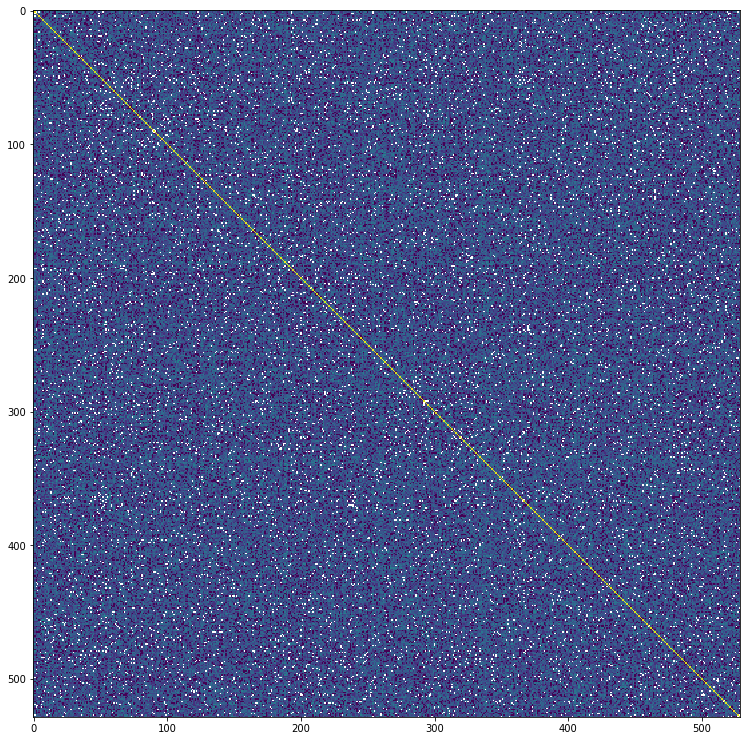

In [10]:
b_ij = (sparse_code_binary[:, np.newaxis, :]>0) * (sparse_code_binary[:, :, np.newaxis]>0)
print('Shape of co-occurrences', b_ij.shape)
print('activation vector', np.count_nonzero(b_ij, axis=0))
fig, ax= plt.subplots(figsize=(13, 13))
ax.imshow(np.log(np.count_nonzero(b_ij, axis=0)));
print('marginal activation vector', np.count_nonzero(b_ij, axis=0).mean(axis=-1))

Min-Max -2.005399985136725e-06 0.0004858999580121514


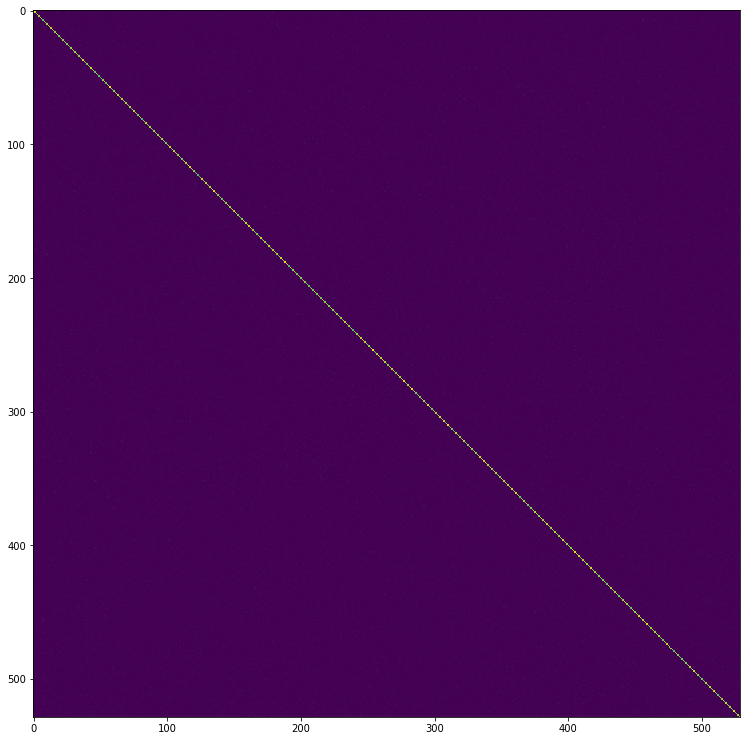

In [11]:
b_ij = (sparse_code_binary[:, np.newaxis, :]>0) * (sparse_code_binary[:, :, np.newaxis]>0)
P_ij = 1.*np.count_nonzero(b_ij, axis=0)
P_ij /= P_ij.sum()
P_i = 1.*np.count_nonzero(sparse_code_binary, axis=0)
P_i /= P_i.sum()
fig, ax= plt.subplots(figsize=(13, 13))
MI_ = - (P_ij * np.log( P_i[:, np.newaxis]*P_i[np.newaxis, :] / P_ij  ))
MI_[P_ij==0] = 0
MI_[(P_i[:, np.newaxis]*P_i[np.newaxis, :])==0] = 0
print('Min-Max', MI_.min(), MI_.max())
ax.imshow(MI_);

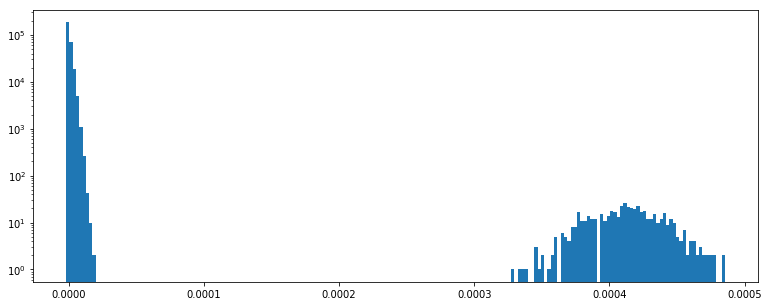

In [12]:
fig, ax= plt.subplots(figsize=(13, 5))
ax.hist(MI_.ravel(), bins=200)
ax.set_yscale('log');

In [13]:
def get_MI(sparse_code):
    b_ij = (sparse_code[:, np.newaxis, :]>0) * (sparse_code[:, :, np.newaxis]>0)
    P_ij = 1.*np.count_nonzero(b_ij, axis=0)
    P_ij /= P_ij.sum()
    P_i = 1.*np.count_nonzero(sparse_code_binary, axis=0)
    P_i /= P_i.sum()
    MI_ = - P_ij * np.log( P_i[:, np.newaxis]*P_i[np.newaxis, :] / P_ij  )
    MI_[P_ij==0] = 0
    MI_[(P_i[:, np.newaxis]*P_i[np.newaxis, :])==0] = 0
    return MI_.sum()
    

In [14]:
for _ in range(10):
    sparse_code_binary = np.random.rand(record_num_batches, shl.n_dictionary) > 1 - rho
    MI = get_MI(sparse_code_binary)
    print ('Mutual information for random sample=', MI)

Mutual information for random sample= 0.3062510254837482
Mutual information for random sample= 0.3090041523875207
Mutual information for random sample= 0.3042862641991946
Mutual information for random sample= 0.30279187982031774
Mutual information for random sample= 0.3068463628387373
Mutual information for random sample= 0.3035893275729984
Mutual information for random sample= 0.306679632035115
Mutual information for random sample= 0.3056537024319822
Mutual information for random sample= 0.30615971409268883
Mutual information for random sample= 0.3059987379998437


## coding

The learning itself is done via a gradient descent but is highly dependent on the coding / decoding algorithm. This belongs to a another function (in the [shl_encode.py](https://github.com/bicv/SHL_scripts/blob/master/shl_scripts/shl_encode.py) script)

In [15]:
from shl_scripts.shl_tools import show_data
def print_stats(data, dictionary, sparse_code):
    print(42*'🐒')

    print('number of codes, size of codewords = ', sparse_code.shape)
    print('average of codewords = ', sparse_code.mean())
    print('average std of codewords = ', sparse_code.std())
    print('l0-sparseness of codewords = ', (sparse_code>0).mean(), ' ~= l0/M =', shl.l0_sparseness/shl.n_dictionary)
    print('std of the average of individual patches = ', sparse_code.mean(axis=0).std())


    plt.matshow(sparse_code[:N_show, :])
    plt.show()
    fig, axs = show_data(data[:max_patches, :])
    plt.show()

    patches = sparse_code @ dictionary
    error = data - patches
    
    print('number of codes, size of reconstructed images = ', patches.shape)

    fig, axs = show_data(patches[:max_patches, :])
    plt.show()
    fig, axs = show_data(error[:max_patches, :], cmax=np.max(np.abs(patches[:max_patches, :])))
    plt.show()
    print('average of data patches = ', data.mean(), '+/-', data.mean(axis=1).std())
    print('average of residual patches = ', error.mean(), '+/-', error.mean(axis=1).std())
    SD = np.sqrt(np.mean(data**2, axis=1))

    print('median energy of data = ', np.median(SD))
    print('average energy of data = ', SD.mean(), '+/-', SD.std())
    
    SE = np.sqrt(np.mean(error**2, axis=1))

    print('average energy of residual = ', SE.mean(), '+/-', SE.std())
    print('median energy of residual = ', np.median(SE))
    print('average gain of coding = ', (SD/SE).mean(), '+/-', (SD/SE).std())
    
    return SD, SE

In [16]:
homeo_methods

['HAP', 'None']

🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒
number of codes, size of codewords =  (4096, 529)
average of codewords =  0.0019801411158431627
average std of codewords =  0.023040440644406586
l0-sparseness of codewords =  0.02556461557774102  ~= l0/M = 0.02835538752362949
std of the average of individual patches =  0.003351418315859225


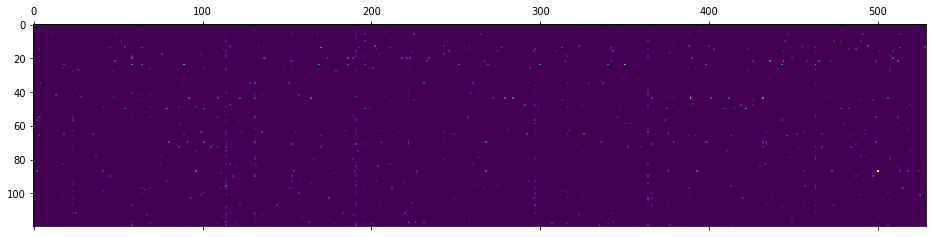

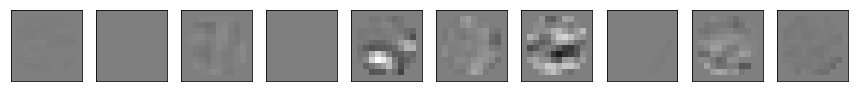

number of codes, size of reconstructed images =  (4096, 144)


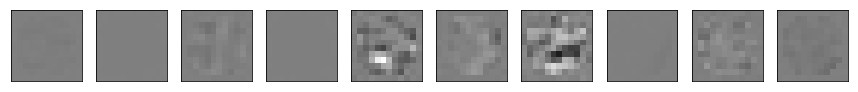

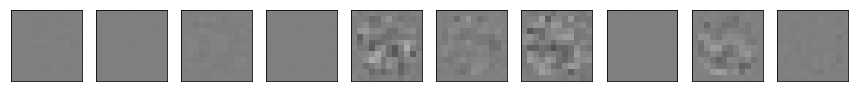

average of data patches =  4.979067591476194e-05 +/- 0.006524584306562247
average of residual patches =  0.00013762758914053874 +/- 0.0014577420108087106
median energy of data =  0.017995085415976962
average energy of data =  0.029609307882095835 +/- 0.03819642946055566
average energy of residual =  0.01382947750101084 +/- 0.01594442801650786
median energy of residual =  0.009464930284145068
average gain of coding =  2.6852602897259406 +/- 1.1729937109474395
🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒
number of codes, size of codewords =  (4096, 529)
average of codewords =  0.0021727621597557225
average std of codewords =  0.023229873183345576
l0-sparseness of codewords =  0.02828154536862004  ~= l0/M = 0.02835538752362949
std of the average of individual patches =  0.0014200582097417698


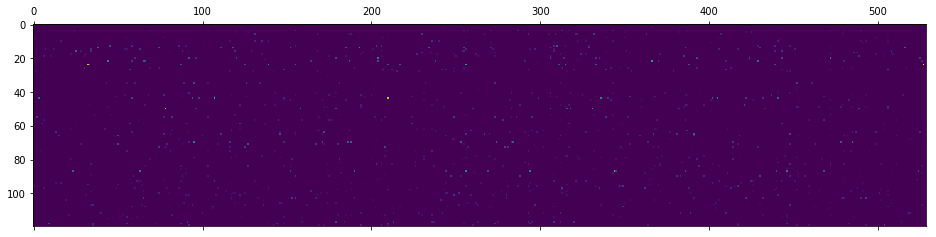

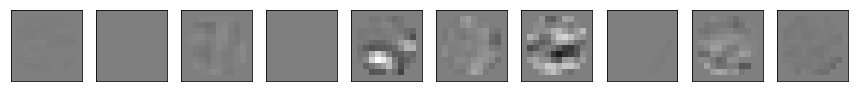

number of codes, size of reconstructed images =  (4096, 144)


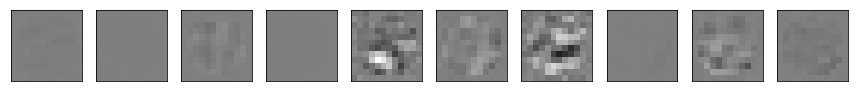

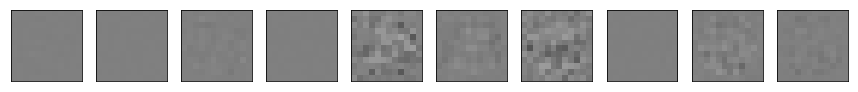

average of data patches =  4.979067591476194e-05 +/- 0.006524584306562247
average of residual patches =  -7.175875447036628e-05 +/- 0.0021599192864203472
median energy of data =  0.017995085415976962
average energy of data =  0.029609307882095835 +/- 0.03819642946055566
average energy of residual =  0.011379414899381057 +/- 0.01455925297143501
median energy of residual =  0.0074208845025289846
average gain of coding =  3.001225266474322 +/- 1.0083810491006098


In [17]:
from shl_scripts.shl_encode import sparse_encode
sparse_code = {}
for homeo_method in homeo_methods:
    if dico[homeo_method].P_cum is None: 
        gain = np.ones(shl.n_dictionary)
    else:
        gain = None
    sparse_code[homeo_method] = sparse_encode(data[indx, :], dico[homeo_method].dictionary, 
                                 P_cum=dico[homeo_method].P_cum, l0_sparseness = shl.l0_sparseness, C=C, gain=gain)
    SD, SE = print_stats(data[indx, :], dico[homeo_method].dictionary, sparse_code[homeo_method])

## measuring the distance to independance 

In [18]:
#fig, ax= plt.subplots(figsize=(13, 5))
for homeo_method in homeo_methods:
    MI = get_MI(sparse_code[homeo_method])
    print ('Mutual information for homeo_method=', homeo_method, 'is', MI)


Mutual information for homeo_method= HAP is 1.5022785156777936
Mutual information for homeo_method= None is 0.8505982802485904


In [19]:
shl.l0_sparseness/shl.n_dictionary

0.02835538752362949

## Version used

In [20]:
%load_ext version_information
%version_information numpy, shl_scripts, pandas

Software versions
Python 3.6.4 64bit [GCC 4.2.1 Compatible Apple LLVM 9.0.0 (clang-900.0.39.2)]
IPython 6.2.1
OS Darwin 17.4.0 x86_64 i386 64bit
numpy 1.14.1
shl_scripts 20171221
pandas 0.22.0
Fri Feb 23 15:46:02 2018 CET